# Load manual task entry from BMI3D database
Requrires BMI3D v0.2.0\
Uses interact

In [1]:
from db import dbfunctions as dbfn
from analysis.target_capture_task_analysis import ManualControlMultiTaskEntry
from datetime import datetime
from ipywidgets import interact
import numpy as np

In [2]:
start = datetime.min
end = datetime.today()
entries = dbfn.query_daterange(start, end)

In [3]:
subjects = np.unique([e.subject.name for e in entries])
tasks = np.unique([e.task.name for e in entries])
def select_filters(task, subject):
    global entries
    entries = dbfn.get_task_entries_by_date(subj=subject, task__name=task)
interact(select_filters, task=tasks, subject=subjects)

interactive(children=(Dropdown(description='task', options=('manual control',), value='manual control'), Dropd…

<function __main__.select_filters(task, subject)>

In [4]:
def select_entry(entry):
    global e
    e = ManualControlMultiTaskEntry(entry) 
interact(select_entry, entry=entries)

interactive(children=(Dropdown(description='entry', options=(2020-12-22 17:12:28.990567: leo on manual control…

<function __main__.select_entry(entry)>

In [8]:
print("ID " + str(e.id))
e.summary_stats()

ID 41
Runtime 00:00:14
Total trials 1
Total rewards 1
Rewards/min 4.22
Success rate 100 %


In [9]:
e.trial_msgs

[array([(b'wait',   0, -1., [ 0.        ,  0.        ,  0.        ]),
        (b'target',   1,  0., [ 0.        ,  0.        ,  0.        ]),
        (b'hold',  84,  0., [-8.84149227, -8.84149227, -8.84149227]),
        (b'targ_transition',  90,  0., [-8.84149227, -8.84149227, -8.84149227]),
        (b'target',  91,  1., [ 0.        ,  0.        ,  0.        ]),
        (b'hold', 104,  1., [ 3.49975338,  3.49975338,  3.49975338]),
        (b'targ_transition', 110,  1., [ 3.49975338,  3.49975338,  3.49975338]),
        (b'target', 111,  2., [-8.84149227, -8.84149227, -8.84149227]),
        (b'hold', 136,  2., [ 0.        ,  0.        ,  0.        ]),
        (b'targ_transition', 142,  2., [ 0.        ,  0.        ,  0.        ]),
        (b'target', 143,  3., [ 3.49975338,  3.49975338,  3.49975338]),
        (b'hold', 166,  3., [ 0.        ,  0.        ,  0.        ]),
        (b'targ_transition', 171,  3., [-8.84149227, -8.84149227, -8.84149227]),
        (b'target', 172,  4., [ 0.    

In [22]:
e.frame_data['manual_input']

array([[-0.1172,  7.4715,  0.    ],
       [-0.0586,  7.2957,  0.    ],
       [-0.0586,  7.2371,  0.    ],
       ...,
       [10.6359, -0.1758,  0.    ],
       [10.6359, -0.1758,  0.    ],
       [10.6359, -0.1758,  0.    ]])

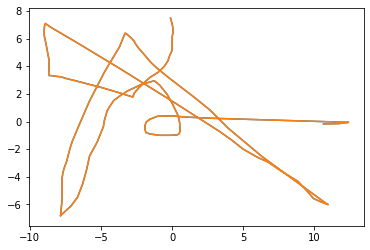

In [24]:
import matplotlib.pyplot as plt
time = 1/60 * np.arange(len(e.frame_data))
plt.plot(e.frame_data['manual_input'][:,0], e.frame_data['manual_input'][:,1])
plt.plot(e.frame_data['cursor'][:,0], e.frame_data['cursor'][:,2])